In [ ]:
from platform import python_version
print(python_version())

In [ ]:
import random
import time
import io
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [37]:
def generateRandomList(sampleSize):
    x = list(range(1,sampleSize+1,1))
    y = random.sample(x,sampleSize)
    return x,y

def bubbleSort(Y, fullOutput = False):
    n = len(Y)
    YY = []
    didSwitch = True
    counterCompares = 0
    counterSwitches = 0
    while didSwitch == True:
        didSwitch = False
        print(Y)
        for i in range(n-1):
            counterCompares += 1
            if Y[i] > Y[i+1]:
                print('      ',i,Y[i],Y[i+1])
                tmp = Y[i]
                Y[i] = Y[i+1]
                Y[i+1] = tmp
                didSwitch = True
                counterSwitches += 1
                if fullOutput:
                    YY.append(Y.copy())
                
    
    if fullOutput:
        return Y, counterCompares, counterSwitches, YY
    else:
        return Y, counterCompares, counterSwitches

In [3]:
X,Y = generateRandomList(10)
Ysorted, counter1, counter2, YY = bubbleSort(Y.copy(),True)
print(counter1, counter2, len(YY))

63 21 21


In [4]:
YY

[[6, 7, 4, 8, 2, 3, 1, 5, 10, 9],
 [6, 7, 4, 2, 8, 3, 1, 5, 10, 9],
 [6, 7, 4, 2, 3, 8, 1, 5, 10, 9],
 [6, 7, 4, 2, 3, 1, 8, 5, 10, 9],
 [6, 7, 4, 2, 3, 1, 5, 8, 10, 9],
 [6, 7, 4, 2, 3, 1, 5, 8, 9, 10],
 [6, 4, 7, 2, 3, 1, 5, 8, 9, 10],
 [6, 4, 2, 7, 3, 1, 5, 8, 9, 10],
 [6, 4, 2, 3, 7, 1, 5, 8, 9, 10],
 [6, 4, 2, 3, 1, 7, 5, 8, 9, 10],
 [6, 4, 2, 3, 1, 5, 7, 8, 9, 10],
 [4, 6, 2, 3, 1, 5, 7, 8, 9, 10],
 [4, 2, 6, 3, 1, 5, 7, 8, 9, 10],
 [4, 2, 3, 6, 1, 5, 7, 8, 9, 10],
 [4, 2, 3, 1, 6, 5, 7, 8, 9, 10],
 [4, 2, 3, 1, 5, 6, 7, 8, 9, 10],
 [2, 4, 3, 1, 5, 6, 7, 8, 9, 10],
 [2, 3, 4, 1, 5, 6, 7, 8, 9, 10],
 [2, 3, 1, 4, 5, 6, 7, 8, 9, 10],
 [2, 1, 3, 4, 5, 6, 7, 8, 9, 10],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [14]:
m = 100
df = pd.DataFrame(columns=['n','opsMean','opsStd','raw'])

for n in (10,20,40,80,160,320,640):
    res = []
    print(n, '....')
    for i in range(m):
        X,Y = generateRandomList(n)
        Ysorted, counter1, counter2 = bubbleSort(Y.copy())
        res.append(counter1)

    df = df.append({'n': n,'opsMean':np.mean(res),'opsStd':np.std(res),'raw':res}, ignore_index=True)
    
df

10 ....
20 ....
40 ....
80 ....
160 ....
320 ....
640 ....


,n,opsMean,opsStd,raw
0,10,67.32,14.705020,"[63, 54, 63, 81, 72, 72, 90, 63, 81, 54, 54, 7..."
1,20,303.05,43.191058,"[323, 323, 361, 342, 266, 342, 285, 228, 285, ..."
2,40,1317.42,147.539634,"[1404, 1248, 1248, 1521, 1404, 1560, 1326, 144..."
3,80,5556.86,394.244037,"[5925, 5293, 6083, 4740, 6083, 5925, 5767, 568..."
4,160,23314.17,1258.744867,"[22737, 22737, 24486, 23373, 21783, 21465, 232..."
5,320,95936.06,3689.002949,"[94743, 87087, 90596, 91234, 100485, 96657, 96..."
6,640,390198.96,10208.620483,"[372537, 394263, 403209, 399375, 394263, 39490..."


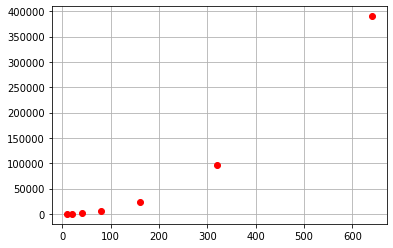

In [17]:
plt.plot(df['n'],df['opsMean'], 'ro')
plt.grid(True)

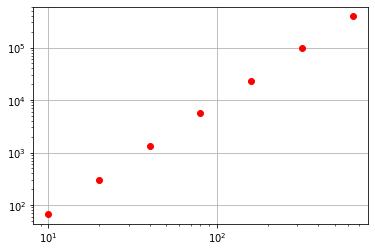

In [18]:
plt.loglog(df['n'],df['opsMean'], 'ro')
plt.grid(True)